# <center><font color=blue>ADTA 5340 - GROUP 1 - FINAL PROJECT </font> </center>  
## <center><font color=blue> ANALYSIS AND MODELLING ON EMPLOYEE DATA
 </font> </center> 

Dataset Source- https://data.bls.gov/projections/occupationProj

# <font color=black>Import Libraries and Load Dataset </font>


# Importing the necessary libraries for data analysis and machine learning



In [1]:
# Importing the libraries which are needed to run the code.

import pandas as pd # library for data manipulation and analysis
import numpy as np # library for numerical computing
import matplotlib.pyplot as plt # library for data visualization
import seaborn as sb # library for data visualization
from pandas.plotting import scatter_matrix # library for scatter plot matrix
from sklearn.model_selection import train_test_split # library for splitting data into training and testing sets
from sklearn.linear_model import LinearRegression # library for linear regression model
from sklearn.tree import DecisionTreeRegressor # library for decision tree regression model
from sklearn.model_selection import KFold # library for k-fold cross validation
from sklearn.model_selection import cross_val_score # library for cross validation score
import statsmodels.api as sm # library for statistical modeling and inference

### **Importing the necessary libraries for data analysis and manipulation**
import pandas as pd

#### Loading the dataset 'Employment Projections.csv' into a pandas dataframe
df = pd.read_csv('Employment Projections.csv')


#### Importing the necessary libraries
Loading the data set 'Employment Projections.csv' into a pandas dataframe
#### **Note**: The file path should be updated according to the location of the file in your system :
df = pd.read_csv('Employment Projections.csv')

#### Displaying the top 5 rows of the dataset to ensure that it has been loaded correctly: 
df.head()






In [2]:
# Load the data set 'Employement Projections.csv' into a pandas dataframe
df = pd.read_csv ('Employment Projections (1).csv') 

# Displaying the top 5 rows of the dataset
df.head()

,Occupation Title,Occupation Code,Employment 2021,Employment 2031,"Employment Change, 2021-2031","Employment Percent Change, 2021-2031","Occupational Openings, 2021-2031 Annual Average",Median Annual Wage 2021,Typical Entry-Level Education,Education Code,Work Experience in a Related Occupation,Workex Code,Typical on-the-job Training,trCode
0,Accountants and auditors * Account Auditor*...,"=""13-2011""","1,449.8","1,531.6",81.8,5.6,136.4,"77,250",Bachelor's degree,3,None,4,None,6
1,Actors * Actor Understudy* Actress* Dramati...,"=""27-2011""",50.6,54.7,4.1,8.2,7.0,NaN,"Some college, no degree",6,None,4,Long-term on-the-job training,3
2,Actuaries * Actuarial Associate* Actuarial ...,"=""15-2011""",28.3,34.2,5.9,20.8,2.4,"105,900",Bachelor's degree,3,None,4,Long-term on-the-job training,3
3,Acupuncturists,"=""29-1291""",23.7,24.6,0.9,3.9,1.7,"60,570",Master's degree,2,None,4,None,6
4,Adhesive bonding machine operators and tenders...,"=""51-9191""",12.7,12.9,0.2,1.5,1.6,"37,630",High school diploma or equivalent,7,None,4,Moderate-term on-the-job training,4


# Data Understanding

#### Displaying the statistical description of the dataset to understand its distribution and characteristics
df.describe()

#### This code block computes various statistical measures such as count, mean, standard deviation, minimum and maximum values, quartiles, etc. of the dataset. These measures provide a summary of the data distribution and help in identifying any outliers or anomalies in the data.

In [3]:
# Statistical description of data
df.describe()

,"Employment Change, 2021-2031","Employment Percent Change, 2021-2031","Occupational Openings, 2021-2031 Annual Average",Education Code,Workex Code,trCode
count,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000
mean,9.997115,4.377043,23.474399,5.199519,3.694712,4.758413
std,48.825625,9.842489,64.430164,2.332958,0.786817,1.308328
min,-335.700000,-38.200000,0.000000,1.000000,1.000000,1.000000
25%,0.100000,0.500000,1.675000,3.000000,4.000000,4.000000
50%,1.400000,4.500000,5.150000,7.000000,4.000000,5.000000
75%,7.700000,8.300000,16.600000,7.000000,4.000000,6.000000
max,924.000000,45.700000,741.400000,8.000000,4.000000,6.000000


#### Displaying the summary of the dataframe to get information about the columns such as datatype, non-null count and memory usage.

df.info()

##### This code block provides information about the dataframe, such as the number of entries, column names, data types, and non-null values in each column. It also gives information about the memory usage of the dataframe. This information helps to understand the structure and contents of the dataset and to identify any missing values or data inconsistencies that need to be addressed before proceeding with further analysis.



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Occupation Title                                 832 non-null    object 
 1   Occupation Code                                  832 non-null    object 
 2   Employment 2021                                  832 non-null    object 
 3   Employment 2031                                  832 non-null    object 
 4   Employment Change, 2021-2031                     832 non-null    float64
 5   Employment Percent Change, 2021-2031             832 non-null    float64
 6   Occupational Openings, 2021-2031 Annual Average  832 non-null    float64
 7   Median Annual Wage 2021                          825 non-null    object 
 8   Typical Entry-Level Education                    832 non-null    object 
 9   Education Code                  

### Displaying the number of rows and columns of the dataset to get an idea about the size of the dataset
df.shape

#### This code block provides the dimensions of the dataset, that is, the number of rows and columns present in the dataset. This information is useful in determining the size of the dataset and for selecting a suitable approach for data analysis. The first number in the output represents the number of rows, and the second number represents the number of columns.

In [5]:
# Size of the dataset
df.shape

(832, 14)

### Displaying the data types of each column in the dataframe to know the types of data that are present in each column
df.dtypes

#### This code block returns the data types of each column in the dataframe. It provides information on whether the columns contain numerical or categorical data, which is important in deciding the type of data processing or cleaning that is required. Numeric data is generally easier to process than categorical data, which may require encoding or mapping to numerical values for analysis.







In [6]:
# Datatypes of the columns in the dataset
df.dtypes

Occupation Title                                    object
Occupation Code                                     object
Employment 2021                                     object
Employment 2031                                     object
Employment Change, 2021-2031                       float64
Employment Percent Change, 2021-2031               float64
Occupational Openings, 2021-2031 Annual Average    float64
Median Annual Wage 2021                             object
Typical Entry-Level Education                       object
Education Code                                       int64
Work Experience in a Related Occupation             object
Workex Code                                          int64
Typical on-the-job Training                         object
trCode                                               int64
dtype: object

### Counting the number of null values in each column of the dataset
df.isnull().sum()

#### This code block returns the number of null or missing values in each column of the dataset. It is important to identify and handle missing data in a dataset before performing any analysis. The presence of missing data can significantly affect the results of data analysis and modelling. The output of this code block provides an overview of the missing data and helps to decide on the appropriate handling strategy such as dropping the missing data or imputing missing values.

In [7]:
# Count of null values in the dataset
df.isnull().sum()

Occupation Title                                   0
Occupation Code                                    0
Employment 2021                                    0
Employment 2031                                    0
Employment Change, 2021-2031                       0
Employment Percent Change, 2021-2031               0
Occupational Openings, 2021-2031 Annual Average    0
Median Annual Wage 2021                            7
Typical Entry-Level Education                      0
Education Code                                     0
Work Experience in a Related Occupation            0
Workex Code                                        0
Typical on-the-job Training                        0
trCode                                             0
dtype: int64

# Exploratory Data Analysis

### Creating a histogram of the dataset to visualize the distribution of the data
##### df.hist(figsize=(12,8), color='green')
##### plt.show()

#### This code block creates a histogram of the dataset, which helps to visualize the distribution of the data. Histograms are a type of bar graph that represents the distribution of continuous data. They are useful in understanding the shape of the data distribution, including the center, spread, and skewness. This information is important in selecting appropriate statistical methods for data analysis. The figsize parameter specifies the size of the histogram plot, and the color parameter sets the color of the bars in the plot.


<function matplotlib.pyplot.show(close=None, block=None)>

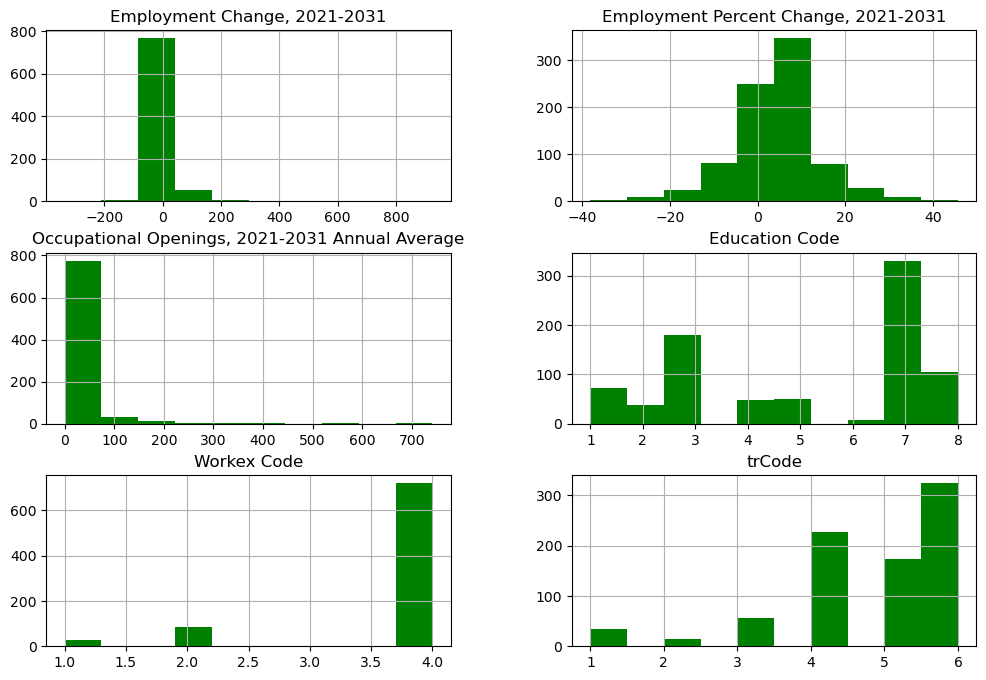

In [8]:
# Create a histogram
# The normal distribution is so important easier for mathematical statisticians to work with. 
# Many kinds of statistical tests can be derived from normal distributions.

df.hist(figsize=(12,8), color='green') 
plt.show

### Creating a heatmap of the correlation among variables in the dataset
##### plt.figure(figsize=(20,10))
##### sns.heatmap(df.corr(),annot=True,cmap='summer');

##### This code block creates a heatmap of the correlation among variables in the dataset. A heatmap is a graphical representation of data where the values are represented by colors. In this case, a color-coded matrix is used to display the correlation between pairs of variables in the dataset. The annot parameter is set to True to show the correlation coefficients in the heatmap, and the cmap parameter is used to set the color map for the heatmap. This visualization is useful in identifying which variables are highly correlated with each other, which can help in feature selection for machine learning models.


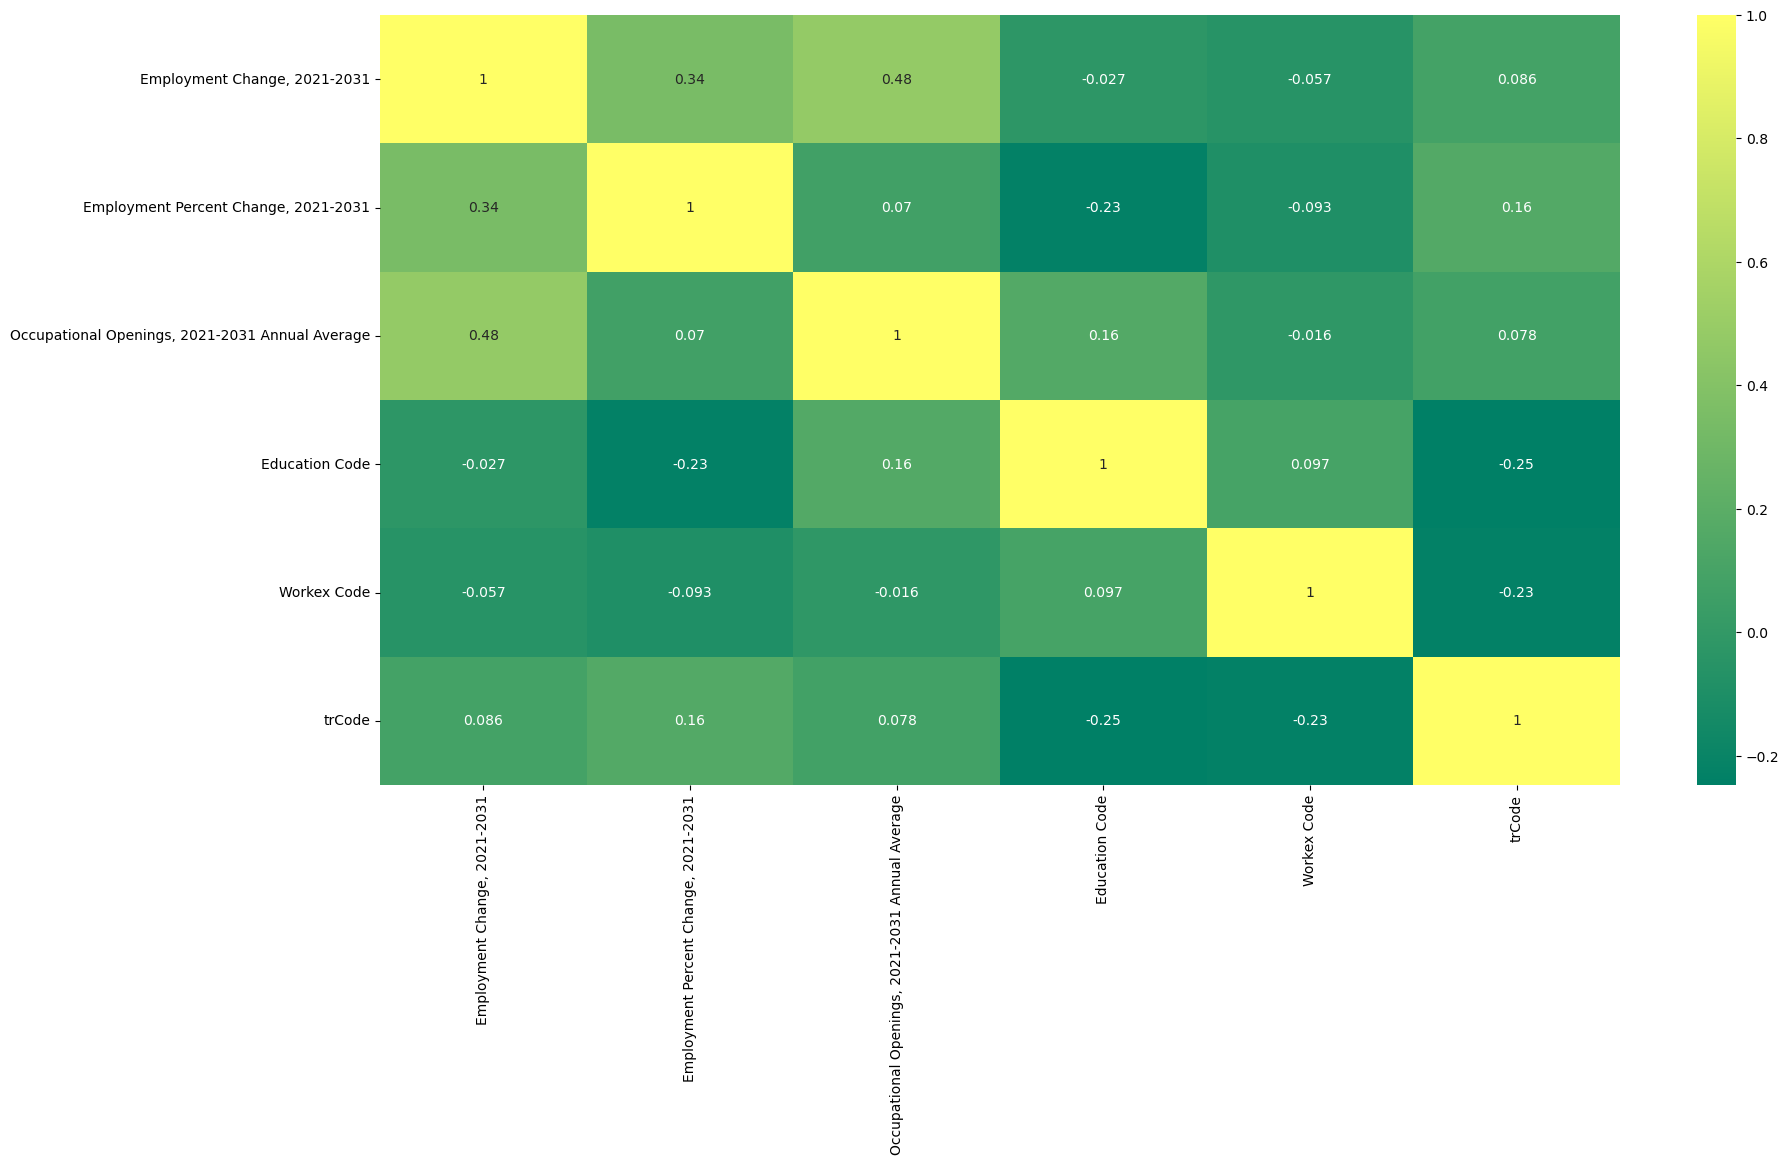

In [9]:
# Correlation among variables is seen using heatmap
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='summer');

### Creating a pie chart and count plot to analyze the typical entry-level education for jobs in the dataset
##### f,ax=plt.subplots(1,2,figsize=(18,8))
##### df['Typical Entry-Level Education'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
##### ax[0].set_title('Percentage of each Entry-Level Education')
##### ax[0].set_ylabel('Count')
##### sns.countplot('Typical Entry-Level Education',data=df,ax=ax[1],order=df['Typical Entry-Level Education'].value_counts().index)
##### ax[1].set_title('count of each Entry-Level Education')
##### ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30, ha="right")
##### plt.show()

##### This code block creates a pie chart and count plot to analyze the typical entry-level education for jobs in the dataset. The pie chart shows the percentage of each entry-level education category, while the count plot displays the count of each category. These visualizations are useful in understanding the distribution of entry-level education for jobs in the dataset and can provide insights into the qualifications required for various job categories. The subplots function is used to create two plots side by side, and the figsize parameter is used to set the size of the figure. The pie chart and count plot are created using the pie and countplot functions from the matplotlib and seaborn libraries, respectively. The set_title and set_xticklabels functions are used to set the title and tick labels for the plots.


C:\Users\vamsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


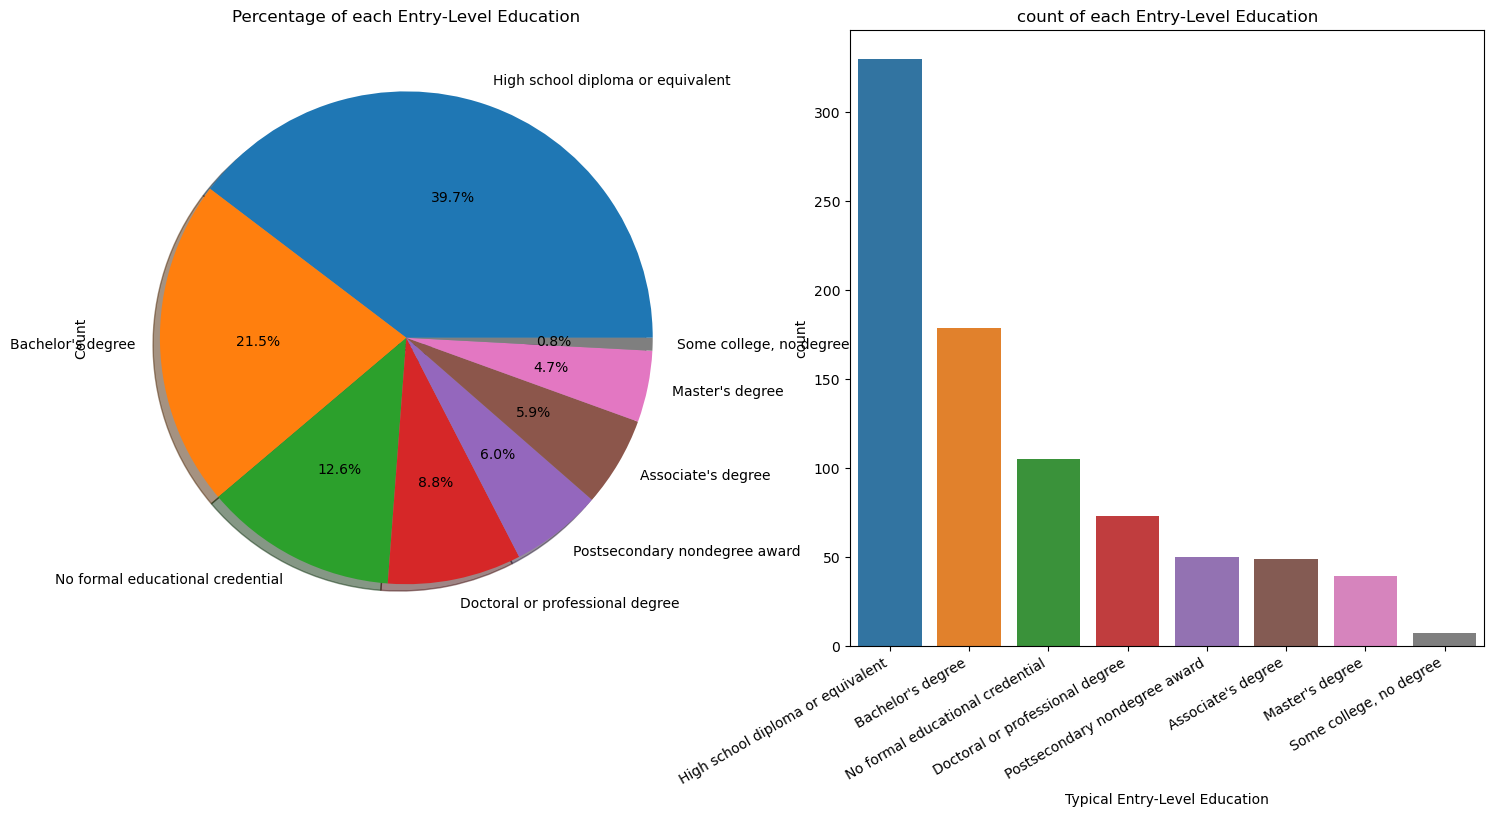

In [10]:
# Pie chart representing analysis on Entry-Level Education
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Typical Entry-Level Education'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Percentage of each Entry-Level Education')
ax[0].set_ylabel('Count')
sns.countplot('Typical Entry-Level Education',data=df,ax=ax[1],order=df['Typical Entry-Level Education'].value_counts().index)
ax[1].set_title('count of each Entry-Level Education')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30, ha="right")
plt.show()

### Creating a pie chart and count plot to analyze the typical on-the-job training for jobs in the dataset
##### f,ax=plt.subplots(1,2,figsize=(18,8))
##### df['TypicalonthejobTraining'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
##### ax[0].set_title('Percentage of each Typical on-the-job Training')
ax[0].set_ylabel('Count')
##### sns.countplot('Typical on-the-job Training',data=df,ax=ax[1],order=df['Typical on-the-job Training'].value_counts().index)
##### ax[1].set_title('count of each Typical on-the-job Training')
##### ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30, ha="right")
##### plt.show()

##### This code block creates a pie chart and count plot to analyze the typical on-the-job training for jobs in the dataset. The pie chart shows the percentage of each on-the-job training category, while the count plot displays the count of each category. These visualizations are useful in understanding the distribution of on-the-job training for jobs in the dataset and can provide insights into the level of training required for various job categories. The subplots function is used to create two plots side by side, and the figsize parameter is used to set the size of the figure. The pie chart and count plot are created using the pie and countplot functions from the matplotlib and seaborn libraries, respectively. The set_title and set_xticklabels functions are used to set the title and tick labels for the plots.


C:\Users\vamsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


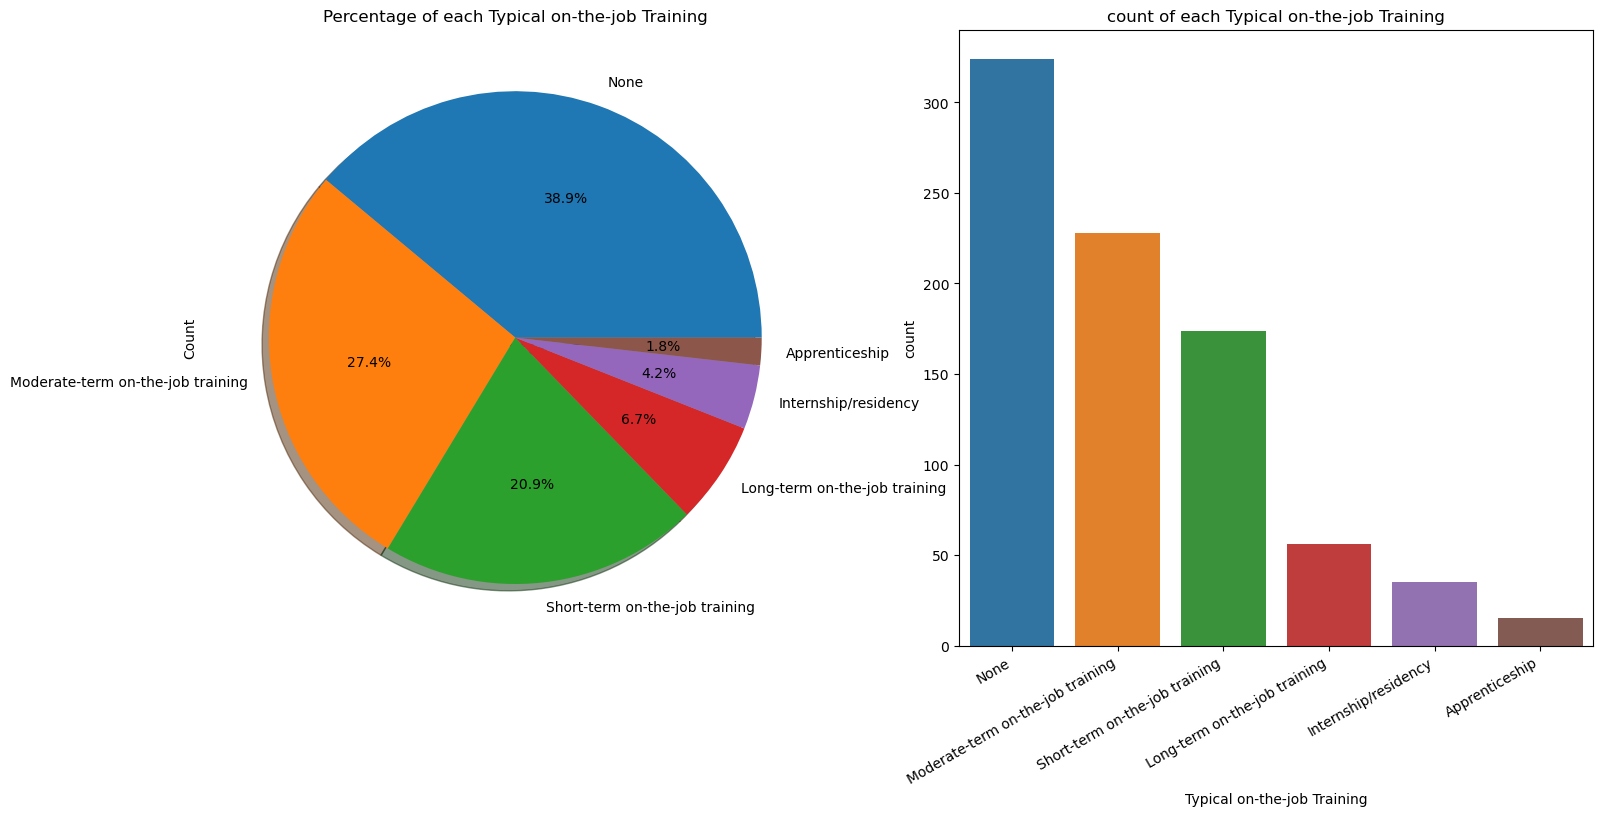

In [11]:
# Pie chart representing analysis on Typical on-the-job Training 
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Typical on-the-job Training'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Percentage of each Typical on-the-job Training')
ax[0].set_ylabel('Count')
sns.countplot('Typical on-the-job Training',data=df,ax=ax[1],order=df['Typical on-the-job Training'].value_counts().index)
ax[1].set_title('count of each Typical on-the-job Training')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30, ha="right")
plt.show()

### Creating a scatter matrix of all the columns in the dataset
##### scatter_matrix(df, alpha=0.8, figsize=(19,9), color = 'purple')
##### plt.show()

##### This code block creates a scatter matrix of all the columns in the dataset. A scatter matrix is a grid of scatterplots that shows the relationship between pairs of variables in a dataset. It is useful in understanding the correlation between variables in a dataset and identifying any patterns or trends. The alpha parameter is used to set the transparency of the data points in the scatterplot, and the figsize parameter is used to set the size of the plot. The color parameter sets the color of the data points in the scatterplot. This visualization is useful in identifying any outliers or relationships between variables that may not be evident in other plots.







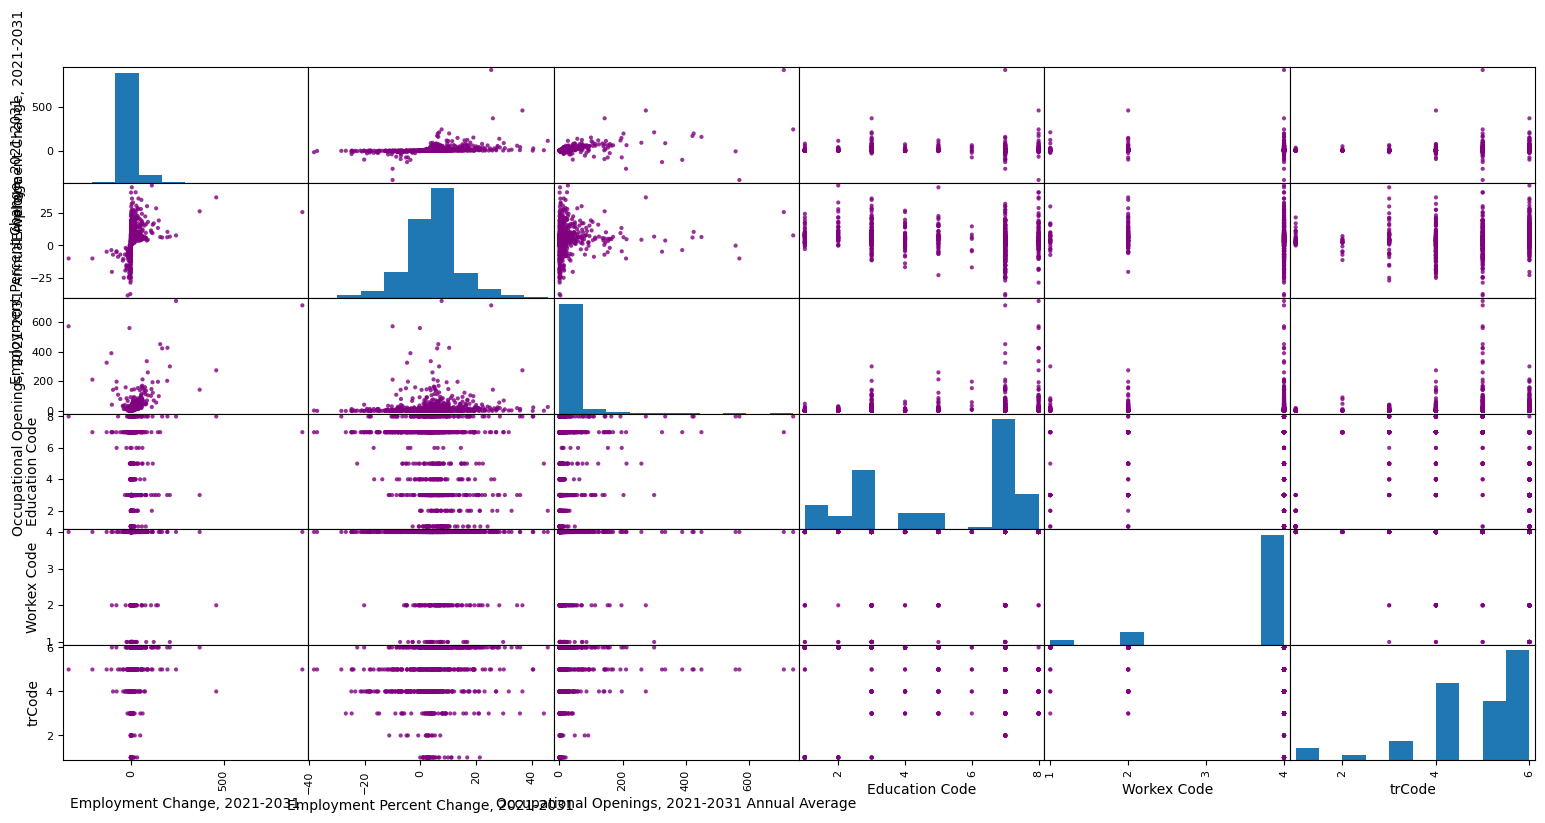

In [12]:
# Scatter matrix of all the columns.
scatter_matrix (df, alpha=0.8, figsize=(19,9), color = 'purple') 
plt.show()

# Data Preparation

#### Checking if there are any null values remaining in the dataset
##### df.isnull().sum()

##### This code block removes any null values from the dataset. The dropna function is used to remove any rows that contain null values. The inplace parameter is set to True to make the changes to the dataframe in place. The isnull and sum functions are used to check if there are any null values remaining in the dataset. If the sum of null values is 0 for all columns, then the null values have been successfully removed from the dataset. Removing null values from the dataset is important as it can improve the accuracy and reliability of the data analysis results.


In [13]:
# Removing the null values
df.dropna(inplace=True)
df.isnull().sum()
# The null values have been removed

Occupation Title                                   0
Occupation Code                                    0
Employment 2021                                    0
Employment 2031                                    0
Employment Change, 2021-2031                       0
Employment Percent Change, 2021-2031               0
Occupational Openings, 2021-2031 Annual Average    0
Median Annual Wage 2021                            0
Typical Entry-Level Education                      0
Education Code                                     0
Work Experience in a Related Occupation            0
Workex Code                                        0
Typical on-the-job Training                        0
trCode                                             0
dtype: int64

In [14]:
# Choosing the most important variables 
df2=df[['Median Annual Wage 2021','Typical Entry-Level Education','Education Code','Work Experience in a Related Occupation','Workex Code','Typical on-the-job Training','trCode']]

In [15]:
# Top 5 rows of the new dataframe
df2.head()

,Median Annual Wage 2021,Typical Entry-Level Education,Education Code,Work Experience in a Related Occupation,Workex Code,Typical on-the-job Training,trCode
0,"77,250",Bachelor's degree,3,None,4,None,6
2,"105,900",Bachelor's degree,3,None,4,Long-term on-the-job training,3
3,"60,570",Master's degree,2,None,4,None,6
4,"37,630",High school diploma or equivalent,7,None,4,Moderate-term on-the-job training,4
5,"102,550",Doctoral or professional degree,1,5 years or more,1,Short-term on-the-job training,5


In [16]:
""" Converting the categorical variables 'Typical Entry-Level Education','Work Experience in a Related Occupation',
'Typical on-the-job Training' into dummies using get_dummies() function"""

df2=pd.get_dummies(df2, columns=['Typical Entry-Level Education','Work Experience in a Related Occupation',
'Typical on-the-job Training'],prefix="", drop_first=True)

In [17]:
df2.head()

,Median Annual Wage 2021,Education Code,Workex Code,trCode,_Bachelor's degree,_Doctoral or professional degree,_High school diploma or equivalent,_Master's degree,_No formal educational credential,_Postsecondary nondegree award,"_Some college, no degree",_Less than 5 years,_None,_Internship/residency,_Long-term on-the-job training,_Moderate-term on-the-job training,_None,_Short-term on-the-job training
0,"77,250",3,4,6,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,"105,900",3,4,3,1,0,0,0,0,0,0,0,1,0,1,0,0,0
3,"60,570",2,4,6,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4,"37,630",7,4,4,0,0,1,0,0,0,0,0,1,0,0,1,0,0
5,"102,550",1,1,5,0,1,0,0,0,0,0,0,0,0,0,0,0,1


### List of columns in dataset

In [18]:
df2.columns

Index(['Median Annual Wage 2021', 'Education Code', 'Workex Code', 'trCode',
       '_Bachelor's degree', '_Doctoral or professional degree',
       '_High school diploma or equivalent', '_Master's degree',
       '_No formal educational credential', '_Postsecondary nondegree award',
       '_Some college, no degree', '_Less than 5 years', '_None',
       '_Internship/residency', '_Long-term on-the-job training',
       '_Moderate-term on-the-job training', '_None',
       '_Short-term on-the-job training'],
      dtype='object')

In [19]:
# Replacing '>=' and ',' from the 'Median Annual Wage 2021'
df2['Median Annual Wage 2021'] = df2['Median Annual Wage 2021'].str.replace('>=','').str.replace(',','').astype(float)
df2.head(10)

,Median Annual Wage 2021,Education Code,Workex Code,trCode,_Bachelor's degree,_Doctoral or professional degree,_High school diploma or equivalent,_Master's degree,_No formal educational credential,_Postsecondary nondegree award,"_Some college, no degree",_Less than 5 years,_None,_Internship/residency,_Long-term on-the-job training,_Moderate-term on-the-job training,_None,_Short-term on-the-job training
0,77250.0,3,4,6,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,105900.0,3,4,3,1,0,0,0,0,0,0,0,1,0,1,0,0,0
3,60570.0,2,4,6,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4,37630.0,7,4,4,0,0,1,0,0,0,0,0,1,0,0,1,0,0
5,102550.0,1,1,5,0,1,0,0,0,0,0,0,0,0,0,0,0,1
6,100170.0,3,2,6,1,0,0,0,0,0,0,1,0,0,0,0,1,0
7,59720.0,3,4,6,1,0,0,0,0,0,0,0,1,0,0,0,1,0
8,127150.0,3,2,6,1,0,0,0,0,0,0,1,0,0,0,0,1,0
9,52340.0,7,4,4,0,0,1,0,0,0,0,0,1,0,0,1,0,0
10,73580.0,4,4,6,0,0,0,0,0,0,0,0,1,0,0,0,1,0


# Splitting the dataset

#### Splitting the dataset into training and testing sets
##### X=df2.drop(['Median Annual Wage 2021'], axis=1)
##### y=df2['Median Annual Wage 2021']

##### The drop function is used to remove the target variable 'Median Annual Wage 2021' from the dataframe, and it is assigned to the variable X. The target variable is assigned to the variable y.
##### The train_test_split function is used to split the dataset into training and testing sets. The X and y variables are passed to the function along with the test_size parameter, which is set to 0.2, indicating that 20% of the data will be used for testing. The random_state parameter is set to 7 to ensure reproducibility of the results.
##### The training and testing sets are assigned to the variables X_train, X_test, y_train, and y_test, which can be used to train and evaluate machine learning models. Splitting the dataset into training and testing sets is an important step in machine learning as it allows us to evaluate the performance of a model on unseen data.



In [20]:
# Splitting data into train and test sets
X=df2.drop(['Median Annual Wage 2021'], axis=1)
y=df2['Median Annual Wage 2021']

# testing data 20% and random_state=7
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=7)


# Building and Training the model

# 1) Linear Regression Model

#### Creating a linear regression model object
##### model = LinearRegression()

##### This code block creates a Linear Regression model object that can be used to fit a linear regression model to the data. Linear regression is a commonly used machine learning algorithm for predicting numerical values. The LinearRegression function is imported from the sklearn.linear_model library, and an instance of the LinearRegression class is created and assigned to the variable model. Once the model object is created, it can be trained on the training data to make predictions on the test data.



In [21]:
model=LinearRegression()

In [22]:
results=model.fit(X_train,y_train)

In [23]:
print ("Intercept:", model.intercept_)
print ("Coefficients:", model.coef_)

Intercept: 160395.67588585248
Coefficients: [ -7689.79374746 -10371.31983671  -6544.59457094   7578.56809326
  23256.50406899   7161.58986536  -3071.86552354  11101.12785735
   1406.37047342  -1890.54799661  -9416.09674589   -318.40769694
  31972.52777484   -173.98460775   -444.02312901   8858.86496487
  -2981.83192993]


# Import necessary libraries
import scikit-learn

# Instantiate a Linear Regression model
linear_regression_model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Parameters:
### copy_X: boolean, optional, default True
### fit_intercept: boolean, optional, default True
### n_jobs: int, optional, default 1
### normalize: boolean, optional, default False

### copy_X: If True, X will be copied; else, it may be overwritten.
### fit_intercept: If True, calculate the intercept for this model.
### n_jobs: The number of jobs to use for the computation. -1 means 'all processors'.
### normalize: If True, X will be normalized by subtracting the mean and dividing by the l2-norm.


In [24]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1, normalize=False)

# Evaluate the performance of the model using the R-squared metric
# Parameters:
### X_test: Test input samples
### y_test: True target values for X_test
### Returns: R^2 score of self.predict(X_test) relative to y_test.

R_squared = model.score(X_test, y_test)

### Print the R-squared score of the model
print("R-squared: ", R_squared)


In [25]:
R_squared = model.score(X_test, y_test)
print("R-squared: ", R_squared)

R-squared:  0.70539365521608


# Train & Score Model 2 Using K-Fold Cross Validation Data Split

# Define the parameters for a k-fold cross-validation procedure
# Parameters:
### n_splits: The number of folds. Must be at least 2.
### random_state: Seed used by the random number generator.
### shuffle: Whether to shuffle the data before splitting into batches.

num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)


In [26]:
num_folds = 10
seed = 7
kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# Define the evaluation metric to use for cross-validation
# Parameters:
### scoring: A string or a scorer callable object/function with signature scorer(estimator, X, y).

scoring = 'neg_mean_squared_error'


In [27]:
scoring = 'neg_mean_squared_error'

# Perform K-fold cross-validation and print the average result
# Parameters:
### model: A supervised learning estimator object implementing 'fit'.
### X: The data to fit.
### y: The target variable to try to predict.
### cv: A cross-validation generator.
### scoring: A scoring method to use for cross-validation.

results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)

# Calculate the mean of all results from K-fold cross-validation and print the result
print("Average of all results from the K-fold Cross-Validation, using negative mean squared error:", results.mean())


In [28]:
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("Average of all results from the K-fold Cross-Validation, using negative mean squared error:",results.mean())

Average of all results from the K-fold Cross-Validation, using negative mean squared error: -454538554.72800475


# Score Using Explained Variance

# Define the parameters for a k-fold cross-validation procedure
# Parameters:
### n_splits: The number of folds. Must be at least 2.
### random_state: Seed used by the random number generator.
### shuffle: Whether to shuffle the data before splitting into batches.

num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# Define the evaluation metric to use for cross-validation
# Parameters:
### scoring: A string or a scorer callable object/function with signature scorer(estimator, X, y).

scoring = 'explained_variance'


In [29]:
num_folds = 10
seed = 7
kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)
scoring = 'explained_variance'

# Perform K-fold cross-validation and print the average result
# Parameters:
### model: A supervised learning estimator object implementing 'fit'.
### X: The data to fit.
### y: The target variable to try to predict.
### cv: A cross-validation generator.
### scoring: A scoring method to use for cross-validation.

results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)

# Calculate the mean of all results from K-fold cross-validation and print the result
print("Average of all results from the K-fold Cross Validation, using explained variance:", results.mean())


In [30]:
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("Average of all results from the K-fold Cross Validation, using exlpained variance:",results.mean())

Average of all results from the K-fold Cross Validation, using exlpained variance: 0.608679025191696


# 2) Decision Tree 

# Build a Decision Tree Regressor model
# Parameters:
### random_state: Seed used by the random number generator.

### Set the random seed for reproducibility
seed = 42

### Instantiate a Decision Tree Regressor model
model1 = DecisionTreeRegressor(random_state=seed)


In [31]:
# Building the model
model1 = DecisionTreeRegressor(random_state=seed)

# Train the decision tree model on the training data
# Parameters:
### X_train: Training input samples
### y_train: True target values for X_train

# Train the decision tree model on the training data
model1.fit(X_train, y_train)


In [32]:
# Train the model using the training sub-dataset
model1.fit(X_train,y_train)

DecisionTreeRegressor(random_state=7)

# Instantiate a Decision Tree Regressor model with the specified hyperparameters
# Parameters:
### criterion: The function to measure the quality of a split. Supported criteria are "mse" for mean squared error.
### max_depth: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples.
### max_features: The number of features to consider when looking for the best split. If None, then all features are considered.
### max_leaf_nodes: The maximum number of leaf nodes in the tree. If None, then unlimited number of leaf nodes are allowed.
### min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
### min_samples_split: The minimum number of samples required to split an internal node.
### min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights (of all input samples) required to be at a leaf node.
### random_state: Seed used by the random number generator.
### splitter: The strategy used to choose the split at each node. Supported strategies are "best" to choose the best split and "random" to choose the best random split.

# Set the random seed for reproducibility
seed = 42

# Instantiate a decision tree regressor model with the specified hyperparameters
model1 = DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                                max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_split=100,
                                min_weight_fraction_leaf=0.0, random_state=seed, splitter='best')


In [33]:
# Non-Linear --> NO coefficients and the intercept
DecisionTreeRegressor (criterion='mse', max_depth=None, max_features=None,
max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_split=100,
min_weight_fraction_leaf=0.0, random_state=seed, splitter='best')

DecisionTreeRegressor(criterion='mse', min_samples_split=100, random_state=7)

# Evaluate the performance of the decision tree model on the test dataset using R-squared metric
# Parameters:
### X_test: Test input samples
### y_test: True target values for X_test
### Returns: R^2 score of self.predict(X_test) relative to y_test.

# Calculate R-squared score for the decision tree model on the test dataset
R_squared = model1.score(X_test, y_test)

# Print the R-squared score for the decision tree model on the test dataset
print('R-Squared = ', R_squared)


In [34]:
R_squared = model1.score(X_test, y_test)
print('R-Squared = ', R_squared)

R-Squared =  0.7925746650857862


# Train & Score Model 2 Using K-Fold Cross Validation Data Split

In [35]:
# Evaluate the algorithm
# Specify the K-size
num_folds = 10 

In [36]:
# Fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated
seed = 7 

# Split the whole data set into k-folds and define the evaluation metric to use for cross-validation
# Parameters:
### n_splits: The number of folds. Must be at least 2.
### random_state: Seed used by the random number generator.
### shuffle: Whether to shuffle the data before splitting into batches.
### scoring: A scoring method to use for cross-validation.

# Define the number of folds and the random seed
num_folds = 10
seed = 42

# Create a cross-validation splitter object
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# Define the evaluation metric to use for cross-validation
scoring = 'neg_mean_squared_error'


In [37]:
# Split the whole data set into folds
kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)
scoring = 'neg_mean_squared_error'

# Train the model and run k-fold cross-validation to evaluate the model
# Parameters:
### model: A supervised learning estimator object implementing 'fit'.
### X: The data to fit.
### y: The target variable to try to predict.
### cv: A cross-validation generator.
### scoring: A scoring method to use for cross-validation.

# Train the model and run k-fold cross-validation to evaluate the model
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)


In [38]:
# Train the model and run K-fold cross-validation to validate/evaluate the model
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)

In [39]:
# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation

print("Average of all results from the K-fold Cross Validation, using negative mean squared error:",results.mean())

Average of all results from the K-fold Cross Validation, using negative mean squared error: -454538554.72800475


# Predictions

# We will be predicting the Median Annual Wage 2021 with the below using Decision Tree Regression
Education code=7

Workex code=4

trcode=4

Typical Entry-Level Education= High School Diploma or Equivalent

Work Experience in a Related Occupation= None

Typical on-the-job Training= Moderate on the job training

The value for the features from the dataset is 37630.0

# Predict target values for a new input using trained models
# Parameters:
### prediction_values: A list of input features to make a prediction.
### model: A supervised learning estimator object implementing 'predict'.

# Define the input feature values to predict the target values
prediction_values = [[7, 4, 4, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]]

# Use the Linear Regression model to predict target values for the input features
y_prediction_lr = model.predict(prediction_values)

# Use the Decision Tree Regression model to predict target values for the input features
y_prediction_dt = model1.predict(prediction_values)

# Print the predicted target values for both models
print("The predicted value using Linear Regression model:", y_prediction_lr)
print("The predicted value using Decision Tree Regression model:", y_prediction_dt)


In [40]:
prediction_values = [[7, 4, 4, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]]

# Using Linear Regression model
y_prediction_lr = model.predict(prediction_values)

#  Decision Tree Regression model
y_prediction_dt = model1.predict(prediction_values)

print("The predicted value using Linear Regression model:", y_prediction_lr)
print("The predicted value using Decision Tree Regression model:", y_prediction_dt)

The predicted value using Linear Regression model: [45302.62106244]
The predicted value using Decision Tree Regression model: [44860.31496063]


C:\Users\vamsh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\vamsh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


# Predicting the Median Salary for Akshitha who will be graduating this Summer.

Education code= 5

Workex code= 2

trcode= 3

Typical Entry-Level Education= Master's Degree

Work Experience in a Related Occupation= Less then 5 years

Typical on-the-job Training= Moderate on the job training

In [45]:
prediction_values_Akshitha = [[5, 2, 3, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]]
# Using Linear Regression model
y_prediction_lr = model.predict(prediction_values_Akshitha)

#  Decision Tree Regression model
y_prediction_dt = model1.predict(prediction_values_Akshitha)

print("The predicted value for Akshitha using Linear Regression model:", y_prediction_lr)
print("The predicted value for Akshitha using Decision Tree Regression model:", y_prediction_dt)

The predicted value for Akshitha using Linear Regression model: [77735.98741283]
The predicted value for Akshitha using Decision Tree Regression model: [53291.42857143]


C:\Users\vamsh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\vamsh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


# Predicting the median salary for Harshitha who will graduating this Fall.
Education code= 5

Workex code= 2

trcode= 3

Typical Entry-Level Education= Bachelor's Degree

Work Experience in a Related Occupation= None

Typical on-the-job Training= None

In [44]:
prediction_values_Harshitha = [[5, 2, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]]
# Using Linear Regression model
y_prediction_lr = model.predict(prediction_values_Sahithi)

#  Decision Tree Regression model
y_prediction_dt = model1.predict(prediction_values_Sahithi)

print("The predicted median salary for Harshitha using Linear Regression model:", y_prediction_lr)
print("The predicted median salary for Harshihta using Decision Tree Regression model:", y_prediction_dt)

The predicted median salary for Harshitha using Linear Regression model: [97689.3091235]
The predicted median salary for Harshihta using Decision Tree Regression model: [47209.44444444]


C:\Users\vamsh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\vamsh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


# Predicting the median salary for Vamshi who will graduating this Fall.
Education code= 5

Workex code= 2

trcode= 3

Typical Entry-Level Education= Bachelor's Degree

Work Experience in a Related Occupation= 5 years or more

Typical on-the-job Training= Moderate on the job training

In [47]:
prediction_values_Vamshi = [[5, 2, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]]
# Using Linear Regression model
y_prediction_lr = model.predict(prediction_values_Vamshi)

#  Decision Tree Regression model
y_prediction_dt = model1.predict(prediction_values_Vamshi)

print("The predicted median salary for Vamshi using Linear Regression model:", y_prediction_lr)
print("The predicted median salary forVamshi using Decision Tree Regression model:", y_prediction_dt)

The predicted median salary for Vamshi using Linear Regression model: [88656.45955088]
The predicted median salary forVamshi using Decision Tree Regression model: [58914.]


C:\Users\vamsh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\vamsh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
